In [67]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# 출처 - https://www.kaggle.com/andrewmvd/fetal-health-classification
health = pd.read_csv('data/fetal_health.csv')

In [69]:
health.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [70]:
health.shape

(2126, 22)

##### 0   baseline value                                          - 심박수 기준점
##### 1   accelerations                                           - 초당 가속도
##### 2   fetal_movement                                          - 초당 이동량
##### 3   uterine_contractions                                    - 초당 자궁수축량
##### 4   light_decelerations                                     - 가벼운 심장 박동수 하락
##### 5   severe_decelerations                                    - 심각한 심장 박동수 하락
##### 6   prolongued_decelerations                                - 장기적 심장 박동수 하락
##### 7   abnormal_short_term_variability                         - 비정상적 순간 변이성
##### 8   mean_value_of_short_term_variability                    - 평균적 순간 변이성
##### 9   percentage_of_time_with_abnormal_long_term_variability       - 순간 변이성 시간적 퍼센티지
##### 10  mean_value_of_long_term_variability                     - 평균적 장기 변이성
##### 21  fetal_health                                            - 태아의 건강

In [71]:
# 히스토그램 삭제
health = health.drop(['histogram_width',
                      'histogram_min',
                      'histogram_max',
                      'histogram_number_of_peaks',
                      'histogram_number_of_zeroes',
                      'histogram_mode',
                      'histogram_mean',
                      'histogram_median',
                      'histogram_variance',
                      'histogram_tendency'], axis = 1)
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [72]:
health.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


In [73]:
health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fetal_health'],
      dtype='object')

In [74]:
import pandas_profiling as pp
#pp.ProfileReport(health)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'baseline value'),
  Text(2, 0, 'accelerations'),
  Text(3, 0, 'fetal_movement'),
  Text(4, 0, 'uterine_contractions'),
  Text(5, 0, 'light_decelerations'),
  Text(6, 0, 'severe_decelerations'),
  Text(7, 0, 'prolongued_decelerations'),
  Text(8, 0, 'abnormal_short_term_variability'),
  Text(9, 0, 'mean_value_of_short_term_variability'),
  Text(10, 0, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(11, 0, 'mean_value_of_long_term_variability'),
  Text(12, 0, 'fetal_health')])

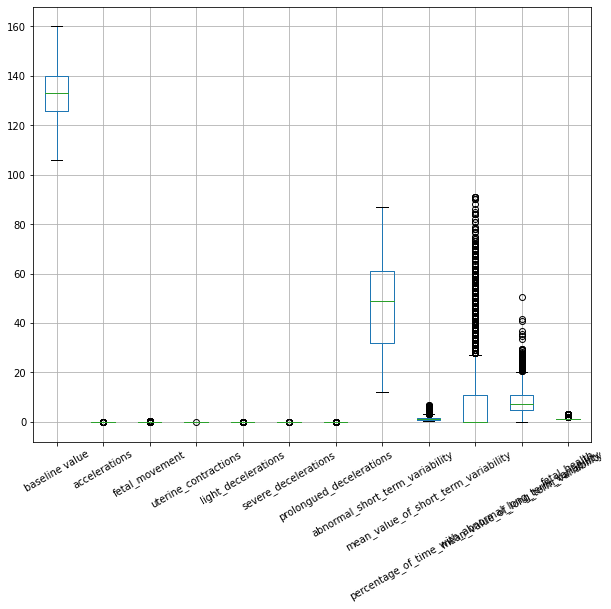

In [75]:
#맨처음에 박스플롯을 그린다 거의 한눈에 다보여주기 때문에
health.boxplot(figsize = (10,8))
plt.xticks(rotation=30)

In [76]:
health[['fetal_health']].head(10)

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
5,3.0
6,3.0
7,3.0
8,3.0
9,3.0


<AxesSubplot:>

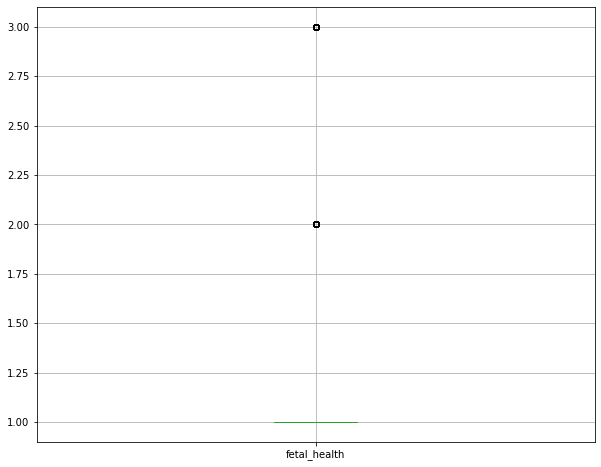

In [77]:
health[['fetal_health']].boxplot(figsize = (10,8))

In [78]:
bins = (0.9, 1.9, 3.1)
group_names = [1, 0]
health['health'] = pd.cut(health['fetal_health'], bins = bins, labels = group_names) 

In [79]:
health.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health,health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0,0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0,1


In [80]:
# 예측변수와 레이블을 나눈다
# X 데이터에서는 'fetal_health' 제거
# y는 레이블만 담는다

X_new = health.drop(["health" ,"fetal_health"],axis=1)
y_ = health["fetal_health"] # regression 용
y = health["health"] # regression 용

In [81]:
X_new.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9


In [82]:
y.value_counts()

1    1655
0     471
Name: health, dtype: int64

In [83]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_val_score
# 간단한 그리드 서치 구현
from sklearn.svm import SVC

In [84]:
sc = StandardScaler()
X = sc.fit_transform(X_new)

In [85]:
X[:5]

array([[-1.35222005, -0.8223883 , -0.20320955, -1.48246456, -0.63843755,
        -0.0574756 , -0.2687543 ,  1.51319018, -0.94309501,  1.80254152,
        -1.02856029],
       [-0.1325256 ,  0.73013282, -0.20320955,  0.55462667,  0.37524298,
        -0.0574756 , -0.2687543 , -1.74475094,  0.8688406 , -0.53536128,
         0.39317594],
       [-0.03088439, -0.04612774, -0.20320955,  1.23365708,  0.37524298,
        -0.0574756 , -0.2687543 , -1.80292846,  0.8688406 , -0.53536128,
         0.92632703],
       [ 0.07075681, -0.04612774, -0.20320955,  1.23365708,  0.37524298,
        -0.0574756 , -0.2687543 , -1.80292846,  1.20857852, -0.53536128,
         2.63241051],
       [-0.1325256 ,  0.98888634, -0.20320955,  1.23365708, -0.63843755,
        -0.0574756 , -0.2687543 , -1.80292846,  1.20857852, -0.53536128,
         2.08148772]])

In [86]:
X.sum()

2.0463630789890885e-12

In [87]:
# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7) # 분류용
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_, test_size = 0.2, random_state = 7) # 회귀용

In [88]:
X_train.shape, y_train.shape

((1700, 11), (1700,))

In [89]:
X_test.shape, y_test.shape

((426, 11), (426,))

In [90]:
def train_and_print(Model, title) : 
    print(title)
    model = Model.fit(X_train, y_train)
    print("훈련 스코어 : {:.3f}".format(model.score(X_train,y_train)))
    print("테스트 스코어 : {:.3f}".format(model.score(X_test,y_test)))

    kfold = KFold(n_splits=10)
    cross_result = cross_val_score(model, X, y, cv=kfold)
    print("교차 검증 점수:\n{}".format(cross_result))
    print("교차 검증 평균 점수 : \n{:.2f}".format(sum(cross_result) / 10))

    pred_model = model.predict(X_test)
    confusion = confusion_matrix(y_test, pred_model)
    print("오차 행렬:\n{}".format(confusion))
    print(classification_report(y_test, pred_model, target_names=['0', '1']))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_scores = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    #roc_auc는 그래프의 넓이를 구한다. 초반에 빨리 올라가면 면적이 넓다.
    #가장 낮은건 평균인 0.5, 최대는 1이 된다.
    roc_auc

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + title)
    plt.legend(loc="lower right")

KNN n_neighbors = 1
훈련 스코어 : 1.000
테스트 스코어 : 0.906
교차 검증 점수:
[0.84976526 0.84507042 0.82629108 0.88262911 0.91549296 0.98122066
 0.8490566  0.93867925 0.81132075 0.75      ]
교차 검증 평균 점수 : 
0.86
오차 행렬:
[[ 73  24]
 [ 16 313]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        97
           1       0.93      0.95      0.94       329

    accuracy                           0.91       426
   macro avg       0.87      0.85      0.86       426
weighted avg       0.90      0.91      0.90       426




KNN n_neighbors = 2
훈련 스코어 : 0.966
테스트 스코어 : 0.904
교차 검증 점수:
[0.83098592 0.87323944 0.83098592 0.85915493 0.89201878 0.98122066
 0.86320755 0.89150943 0.83490566 0.68396226]
교차 검증 평균 점수 : 
0.85
오차 행렬:
[[ 84  13]
 [ 28 301]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        97
           1       0.96      0.91      0.94       329

    accuracy                           0.90       426
   m

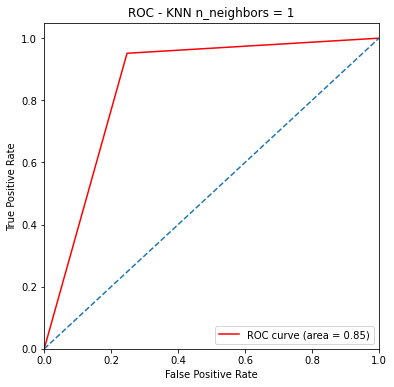

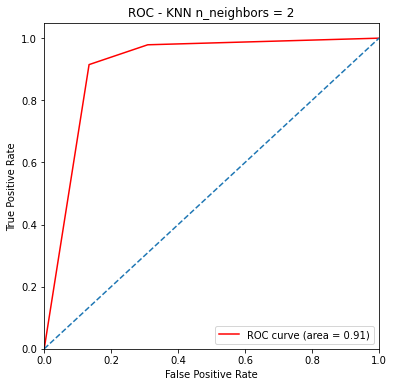

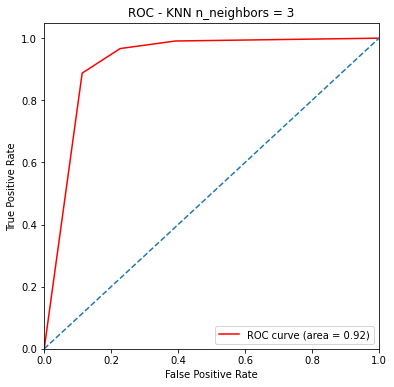

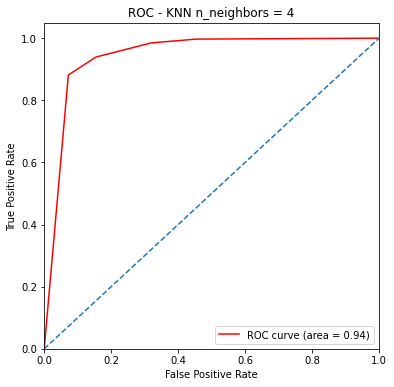

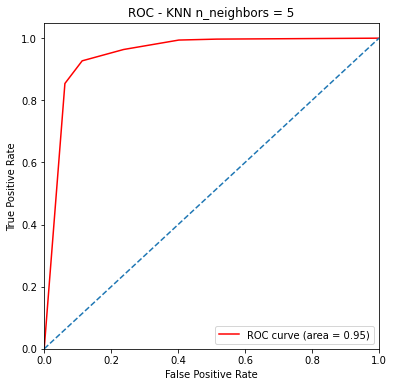

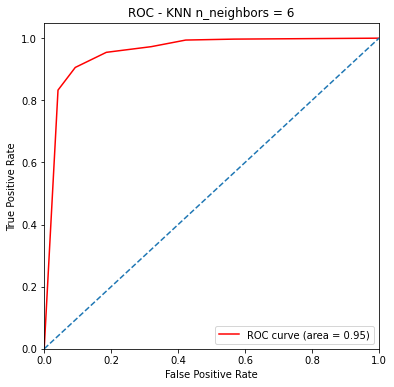

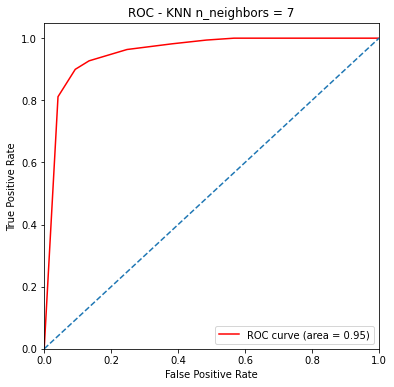

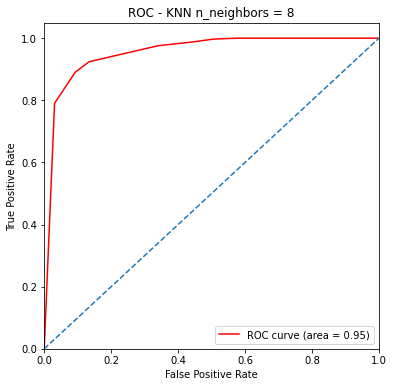

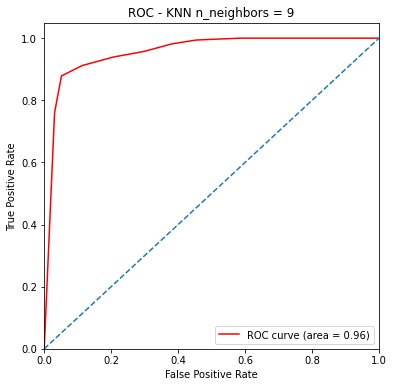

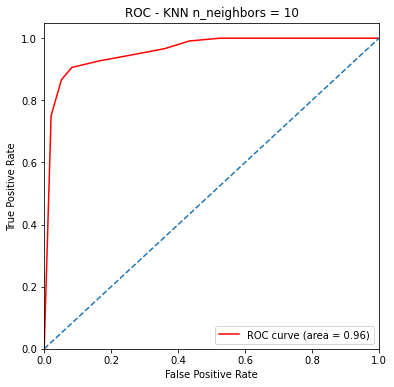

In [91]:
for i in range(1, 11) : 
    knn = KNeighborsClassifier(n_neighbors=i)
    train_and_print(knn, 'KNN n_neighbors = ' + str(i))
    print('\n\n')

clf criterion='gini', max_depth = 1
훈련 스코어 : 0.858
테스트 스코어 : 0.850
교차 검증 점수:
[0.8685446  0.40375587 0.86384977 0.90140845 0.98122066 0.98122066
 0.87264151 0.74528302 0.69811321 0.29245283]
교차 검증 평균 점수 : 
0.76
오차 행렬:
[[ 61  36]
 [ 28 301]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        97
           1       0.89      0.91      0.90       329

    accuracy                           0.85       426
   macro avg       0.79      0.77      0.78       426
weighted avg       0.85      0.85      0.85       426




clf criterion='gini', max_depth = 2
훈련 스코어 : 0.907
테스트 스코어 : 0.925
교차 검증 점수:
[0.89201878 0.89671362 0.88732394 0.76995305 0.98591549 1.
 0.86320755 0.90566038 0.82075472 0.58962264]
교차 검증 평균 점수 : 
0.86
오차 행렬:
[[ 76  21]
 [ 11 318]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83        97
           1       0.94      0.97      0.95       329

    accuracy                      

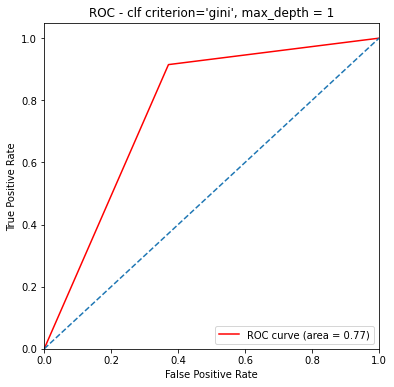

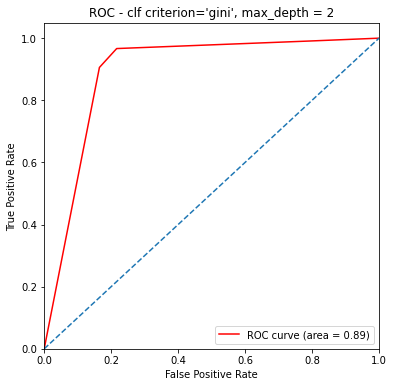

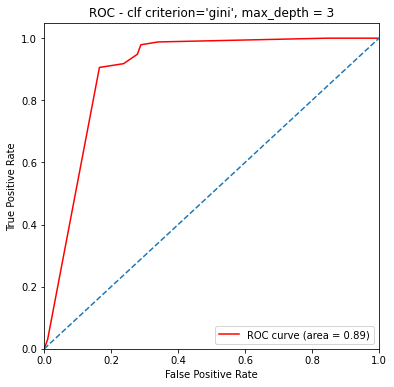

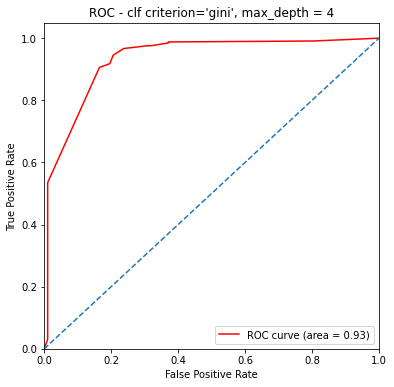

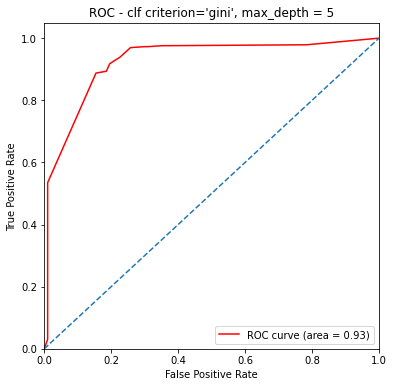

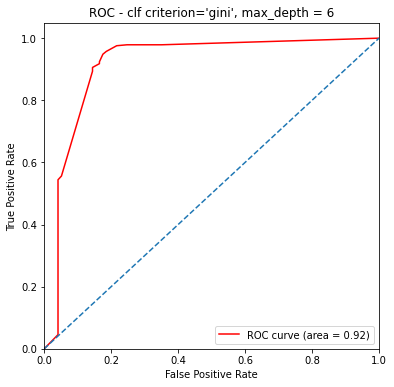

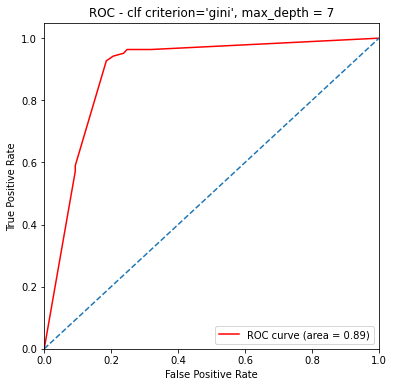

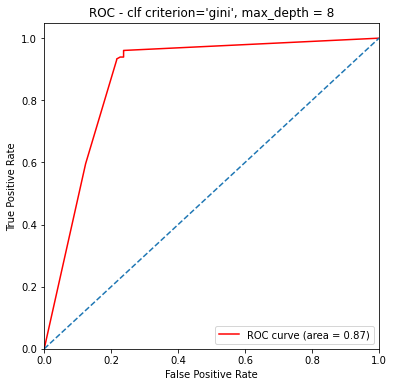

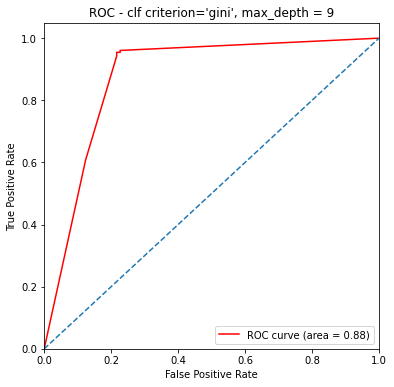

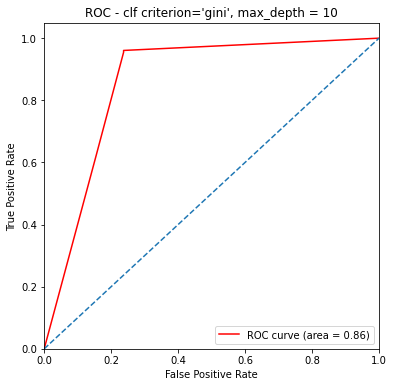

In [92]:
for i in range(1, 11) : 
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    train_and_print(clf, 'clf criterion=\'gini\', max_depth = ' + str(i))
    print('\n\n')

clf criterion='entropy', max_depth=1
훈련 스코어 : 0.823
테스트 스코어 : 0.840
교차 검증 점수:
[0.8685446  0.40375587 0.90610329 0.90140845 0.99530516 1.
 0.87264151 0.74528302 0.69811321 0.29245283]
교차 검증 평균 점수 : 
0.77
오차 행렬:
[[ 76  21]
 [ 47 282]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        97
           1       0.93      0.86      0.89       329

    accuracy                           0.84       426
   macro avg       0.77      0.82      0.79       426
weighted avg       0.86      0.84      0.85       426




clf criterion='entropy', max_depth=2
훈련 스코어 : 0.873
테스트 스코어 : 0.857
교차 검증 점수:
[0.86384977 0.89671362 0.88732394 0.72300469 0.99530516 1.
 0.74528302 0.90566038 0.82075472 0.5990566 ]
교차 검증 평균 점수 : 
0.84
오차 행렬:
[[ 45  52]
 [  9 320]]
              precision    recall  f1-score   support

           0       0.83      0.46      0.60        97
           1       0.86      0.97      0.91       329

    accuracy                           0

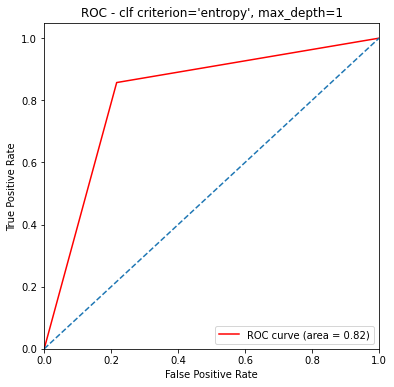

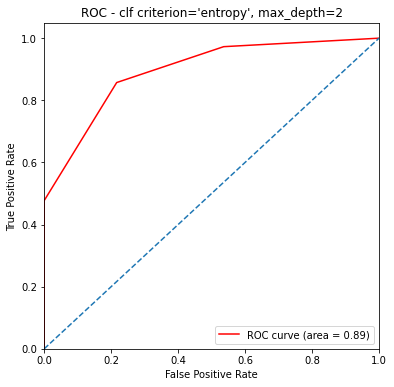

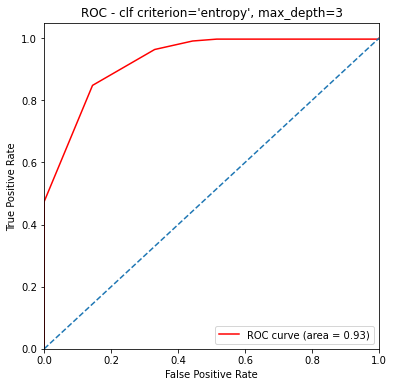

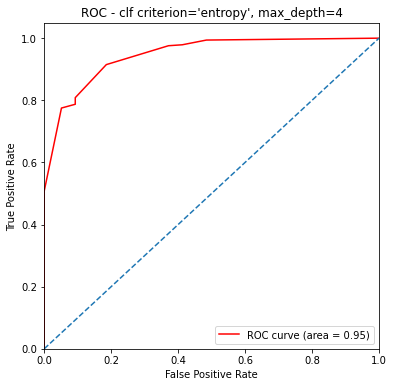

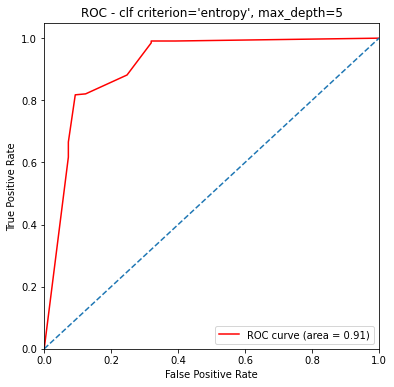

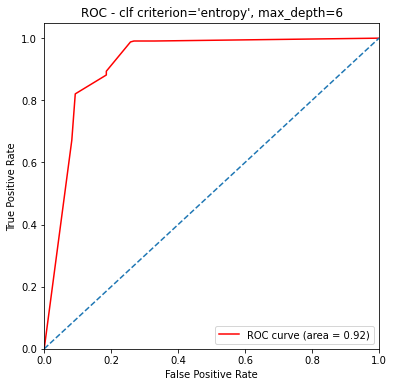

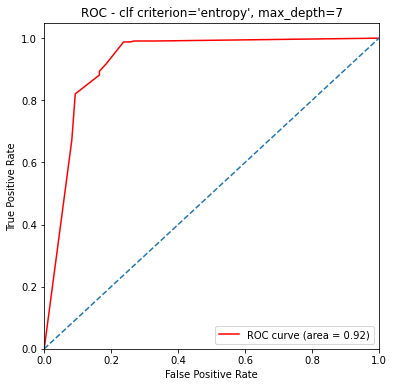

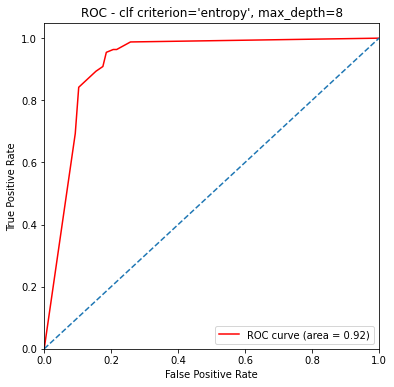

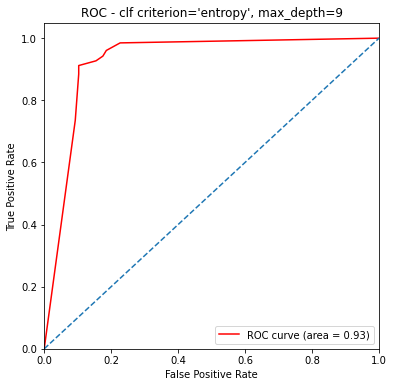

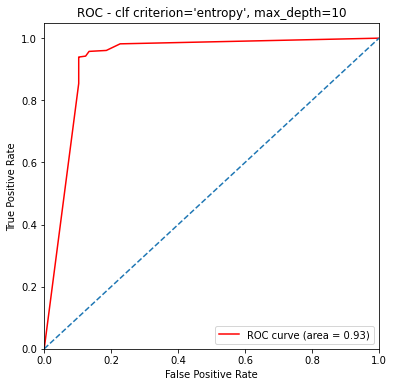

In [93]:
for i in range(1, 11) : 
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    train_and_print(clf, 'clf criterion=\'entropy\', max_depth=' + str(i))
    print('\n\n')

gbc loss='deviance',learning_rate= 0.01, n_estimators=100, max_depth = 1
훈련 스코어 : 0.865
테스트 스코어 : 0.854
교차 검증 점수:
[0.81220657 0.40375587 0.74178404 0.58685446 0.99061033 0.97652582
 0.87264151 0.90566038 0.71226415 0.74056604]
교차 검증 평균 점수 : 
0.77
오차 행렬:
[[ 37  60]
 [  2 327]]
              precision    recall  f1-score   support

           0       0.95      0.38      0.54        97
           1       0.84      0.99      0.91       329

    accuracy                           0.85       426
   macro avg       0.90      0.69      0.73       426
weighted avg       0.87      0.85      0.83       426

gbc loss='deviance',learning_rate= 0.01, n_estimators=100, max_depth = 2
훈련 스코어 : 0.888
테스트 스코어 : 0.873
교차 검증 점수:
[0.84037559 0.79812207 0.8685446  0.83098592 0.99061033 1.
 0.8490566  0.93396226 0.81132075 0.5990566 ]
교차 검증 평균 점수 : 
0.85
오차 행렬:
[[ 47  50]
 [  4 325]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.64        97
           1      

훈련 스코어 : 1.000
테스트 스코어 : 0.927
교차 검증 점수:
[0.87793427 0.90610329 0.92488263 0.88732394 0.99061033 0.98591549
 0.86320755 0.87264151 0.80188679 0.66981132]
교차 검증 평균 점수 : 
0.88
오차 행렬:
[[ 80  17]
 [ 14 315]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        97
           1       0.95      0.96      0.95       329

    accuracy                           0.93       426
   macro avg       0.90      0.89      0.90       426
weighted avg       0.93      0.93      0.93       426

gbc loss='deviance',learning_rate= 10, n_estimators=100, max_depth = 1
훈련 스코어 : 0.780
테스트 스코어 : 0.772
교차 검증 점수:
[0.1314554  0.06103286 0.74178404 0.09859155 0.98591549 0.97183099
 0.12735849 0.25471698 0.79245283 0.70754717]
교차 검증 평균 점수 : 
0.49
오차 행렬:
[[  0  97]
 [  0 329]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.77      1.00      0.87       329

    accuracy                  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


테스트 스코어 : 0.150
교차 검증 점수:
[0.1314554  0.06103286 0.13615023 0.05164319 0.01877934 0.02816901
 0.12735849 0.25471698 0.20754717 0.70754717]
교차 검증 평균 점수 : 
0.17
오차 행렬:
[[ 36  61]
 [301  28]]
              precision    recall  f1-score   support

           0       0.11      0.37      0.17        97
           1       0.31      0.09      0.13       329

    accuracy                           0.15       426
   macro avg       0.21      0.23      0.15       426
weighted avg       0.27      0.15      0.14       426

gbc loss='deviance',learning_rate= 10, n_estimators=100, max_depth = 3
훈련 스코어 : 0.154
테스트 스코어 : 0.164
교차 검증 점수:
[0.75117371 0.41784038 0.74178404 0.48356808 0.98591549 0.97183099
 0.86320755 0.16509434 0.19339623 0.50471698]
교차 검증 평균 점수 : 
0.61
오차 행렬:
[[ 45  52]
 [304  25]]
              precision    recall  f1-score   support

           0       0.13      0.46      0.20        97
           1       0.32      0.08      0.12       329

    accuracy                           0.16  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_la

교차 검증 점수:
[0.24413146 0.89671362 0.74178404 0.72300469 0.00938967 0.00469484
 0.11792453 0.25471698 0.23584906 0.49528302]
교차 검증 평균 점수 : 
0.37
오차 행렬:
[[ 76  21]
 [ 11 318]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83        97
           1       0.94      0.97      0.95       329

    accuracy                           0.92       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.92      0.92      0.92       426

gbc loss='deviance',learning_rate= 100, n_estimators=100, max_depth = 3
훈련 스코어 : 0.148
테스트 스코어 : 0.164
교차 검증 점수:
[0.25352113 0.1971831  0.16431925 0.56807512 0.00938967 0.00469484
 0.13679245 0.08962264 0.90566038 0.70754717]
교차 검증 평균 점수 : 
0.30
오차 행렬:
[[ 42  55]
 [301  28]]
              precision    recall  f1-score   support

           0       0.12      0.43      0.19        97
           1       0.34      0.09      0.14       329

    accuracy                           0.16       426
   mac

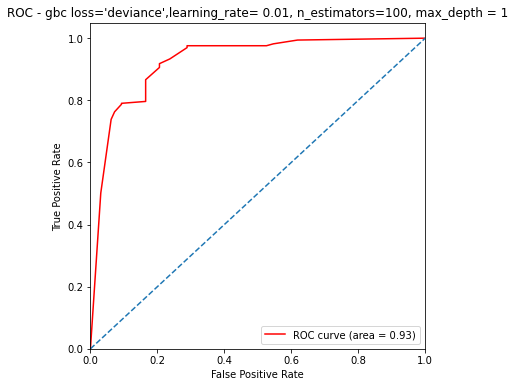

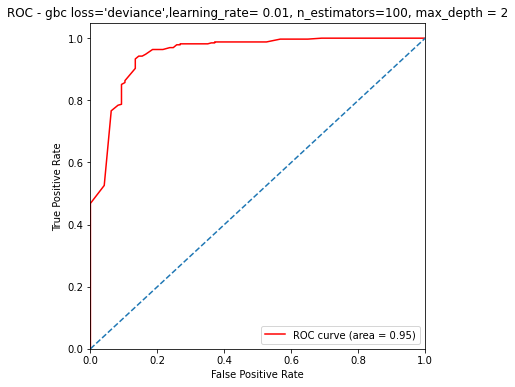

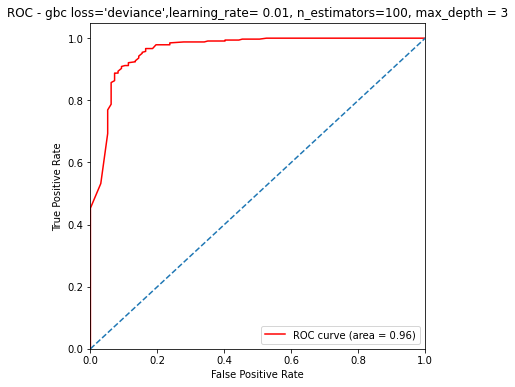

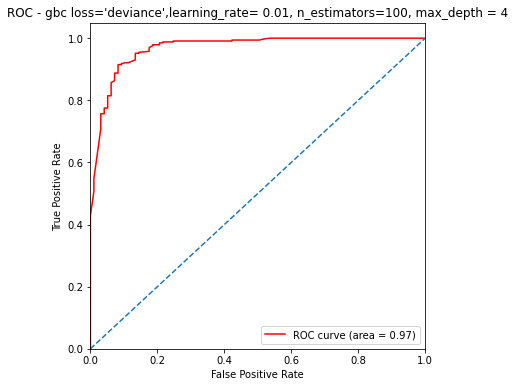

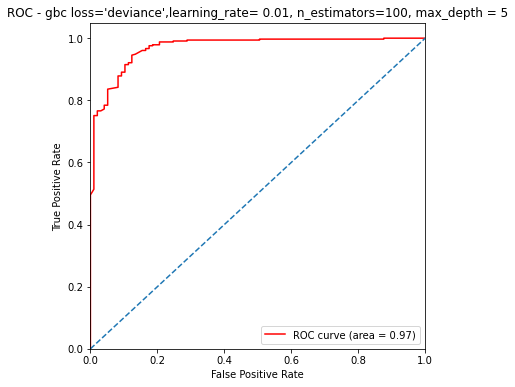

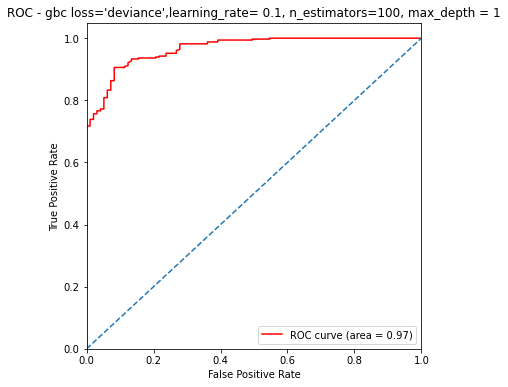

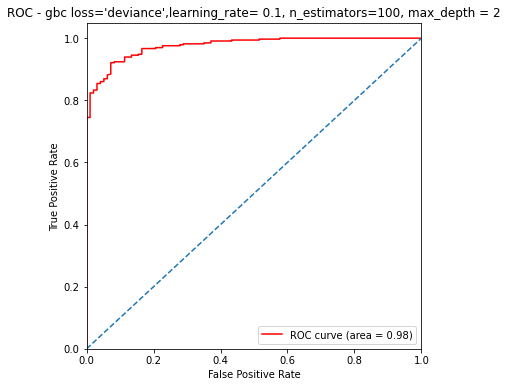

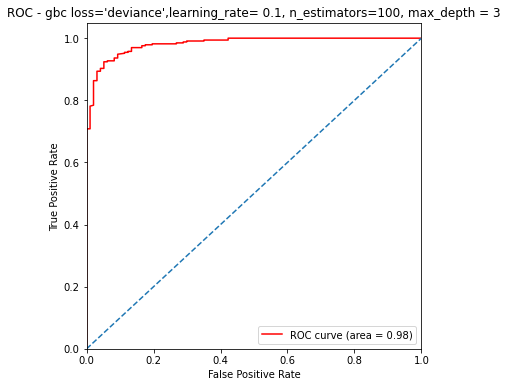

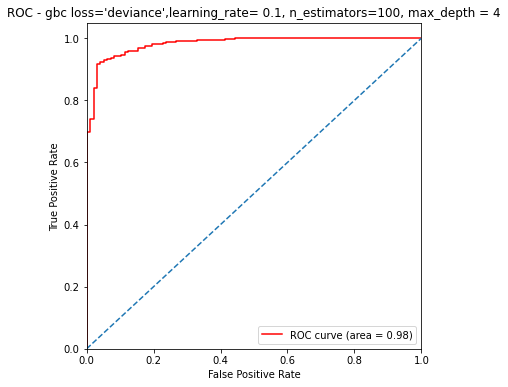

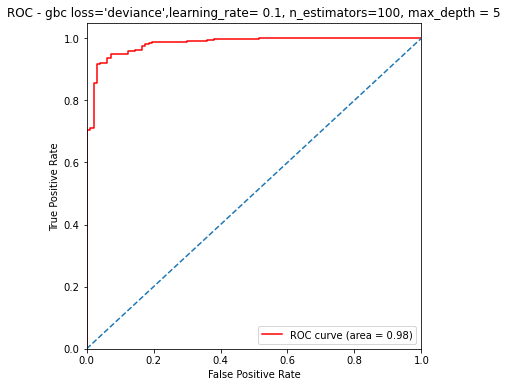

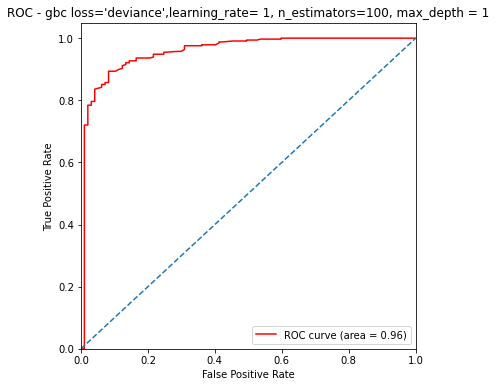

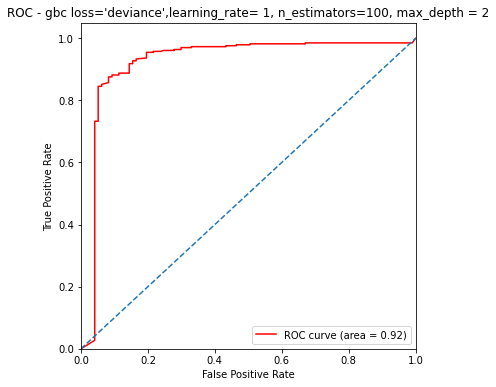

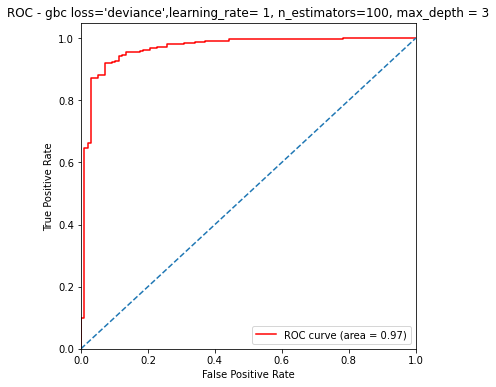

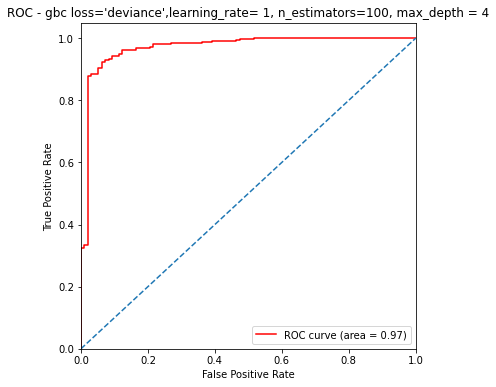

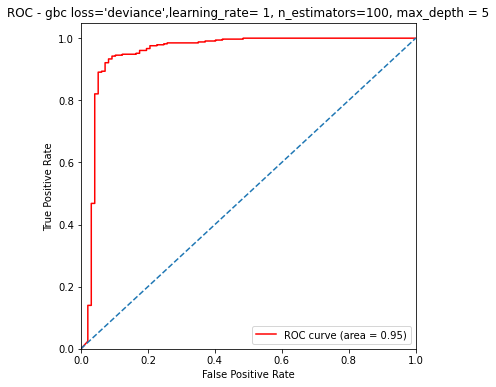

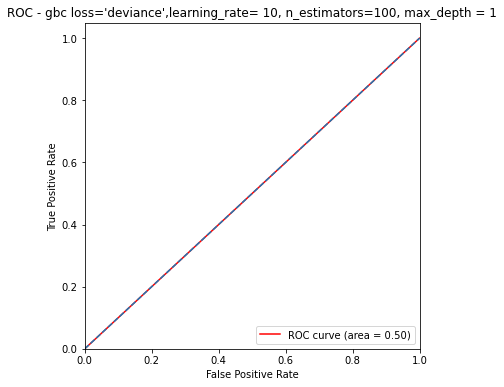

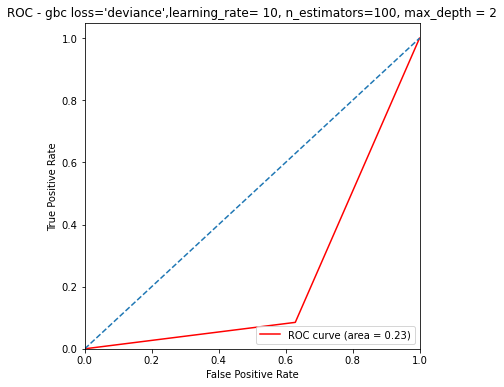

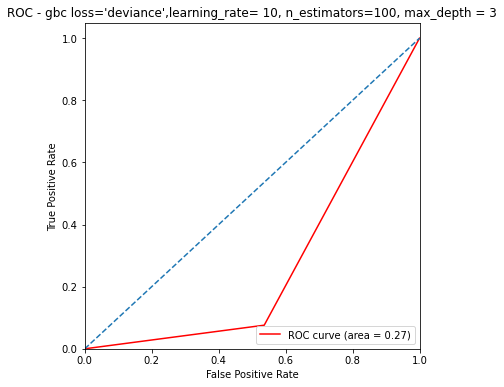

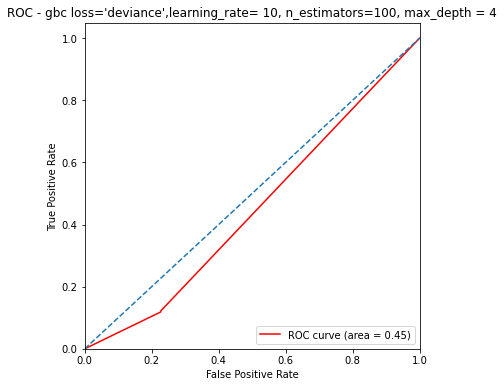

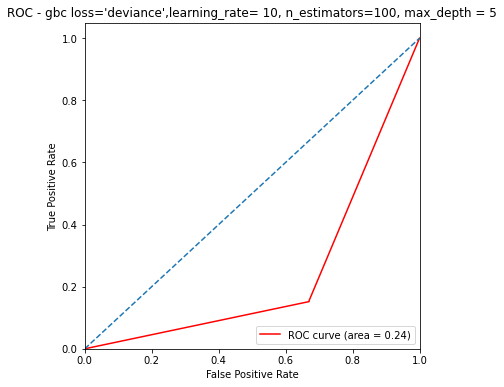

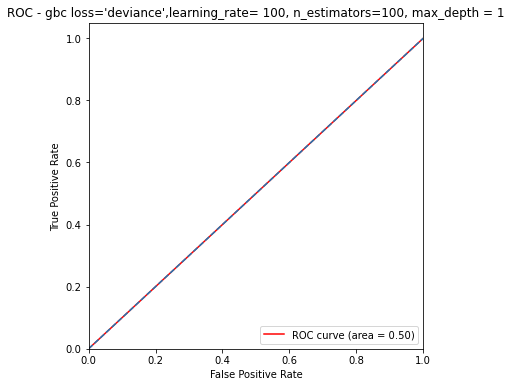

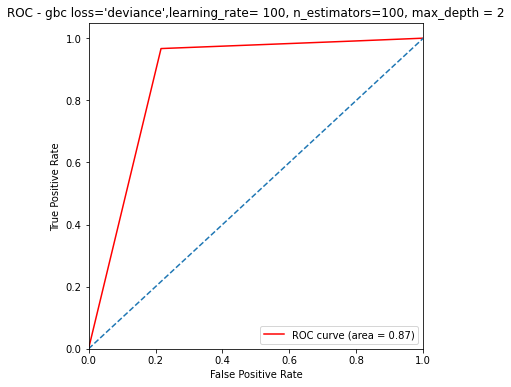

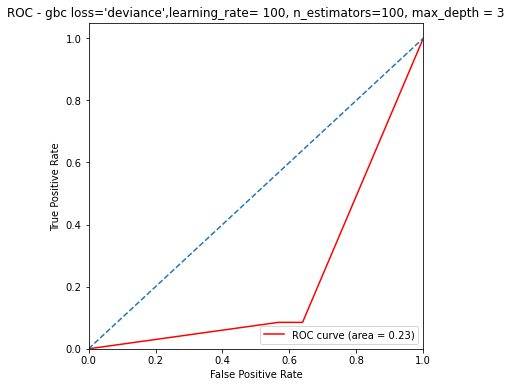

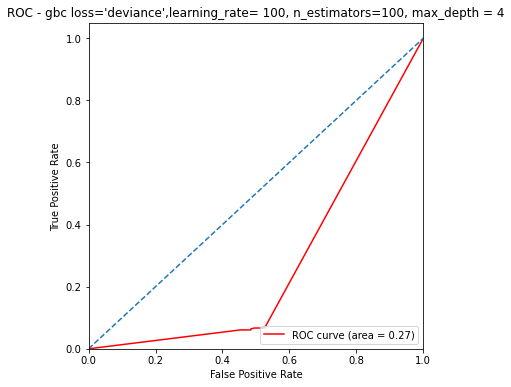

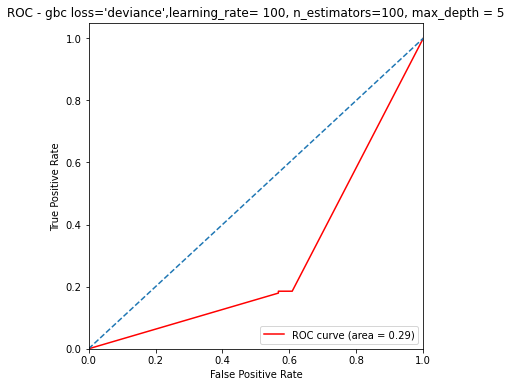

In [94]:
for learning_rate in [0.01, 0.1, 1, 10, 100] : 
    for i in range(1, 6) : 
        gbc = GradientBoostingClassifier(loss='deviance',learning_rate=learning_rate, n_estimators=100, max_depth = i)
        train_and_print(gbc, 'gbc loss=\'deviance\',learning_rate= '+ str(learning_rate) + ', n_estimators=100, max_depth = ' + str(i))

gbc loss='exponential',learning_rate= 0.01, n_estimators=100, max_depth = 1
훈련 스코어 : 0.782
테스트 스코어 : 0.772
교차 검증 점수:
[0.75117371 0.40375587 0.74178404 0.57276995 0.98591549 0.97183099
 0.85377358 0.91037736 0.79245283 0.74056604]
교차 검증 평균 점수 : 
0.77
오차 행렬:
[[  0  97]
 [  0 329]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.77      1.00      0.87       329

    accuracy                           0.77       426
   macro avg       0.39      0.50      0.44       426
weighted avg       0.60      0.77      0.67       426

gbc loss='exponential',learning_rate= 0.01, n_estimators=100, max_depth = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


훈련 스코어 : 0.876
테스트 스코어 : 0.857
교차 검증 점수:
[0.83098592 0.40375587 0.86384977 0.71361502 0.99061033 0.98122066
 0.85377358 0.92924528 0.75943396 0.61792453]
교차 검증 평균 점수 : 
0.79
오차 행렬:
[[ 37  60]
 [  1 328]]
              precision    recall  f1-score   support

           0       0.97      0.38      0.55        97
           1       0.85      1.00      0.91       329

    accuracy                           0.86       426
   macro avg       0.91      0.69      0.73       426
weighted avg       0.87      0.86      0.83       426

gbc loss='exponential',learning_rate= 0.01, n_estimators=100, max_depth = 3
훈련 스코어 : 0.906
테스트 스코어 : 0.883
교차 검증 점수:
[0.84507042 0.58685446 0.86384977 0.8028169  0.98591549 0.98591549
 0.85377358 0.94339623 0.83018868 0.76415094]
교차 검증 평균 점수 : 
0.85
오차 행렬:
[[ 48  49]
 [  1 328]]
              precision    recall  f1-score   support

           0       0.98      0.49      0.66        97
           1       0.87      1.00      0.93       329

    accuracy             

교차 검증 점수:
[0.1314554  0.06103286 0.13615023 0.09859155 0.01877934 0.01877934
 0.12735849 0.25471698 0.30188679 0.70754717]
교차 검증 평균 점수 : 
0.19
오차 행렬:
[[ 36  61]
 [301  28]]
              precision    recall  f1-score   support

           0       0.11      0.37      0.17        97
           1       0.31      0.09      0.13       329

    accuracy                           0.15       426
   macro avg       0.21      0.23      0.15       426
weighted avg       0.27      0.15      0.14       426

gbc loss='exponential',learning_rate= 10, n_estimators=100, max_depth = 2
훈련 스코어 : 0.108
테스트 스코어 : 0.110
교차 검증 점수:
[0.26760563 0.85915493 0.13615023 0.31455399 0.02816901 0.01877934
 0.84433962 0.87735849 0.79245283 0.24528302]
교차 검증 평균 점수 : 
0.44
오차 행렬:
[[ 16  81]
 [298  31]]
              precision    recall  f1-score   support

           0       0.05      0.16      0.08        97
           1       0.28      0.09      0.14       329

    accuracy                           0.11       426
   m

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


교차 검증 점수:
[0.13615023 0.40375587 0.13615023 0.57276995 0.02816901 0.01877934
 0.85377358 0.91037736 0.18867925 0.80188679]
교차 검증 평균 점수 : 
0.41
오차 행렬:
[[ 16  81]
 [298  31]]
              precision    recall  f1-score   support

           0       0.05      0.16      0.08        97
           1       0.28      0.09      0.14       329

    accuracy                           0.11       426
   macro avg       0.16      0.13      0.11       426
weighted avg       0.23      0.11      0.13       426

gbc loss='exponential',learning_rate= 100, n_estimators=100, max_depth = 3
훈련 스코어 : 0.815
테스트 스코어 : 0.808
교차 검증 점수:
[0.75117371 0.40375587 0.74647887 0.22065728 0.47887324 0.47887324
 0.84433962 0.91037736 0.19339623 0.5       ]
교차 검증 평균 점수 : 
0.55
오차 행렬:
[[ 15  82]
 [  0 329]]
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        97
           1       0.80      1.00      0.89       329

    accuracy                           0.81       426
   

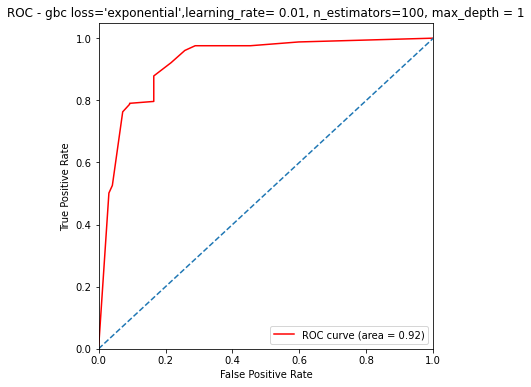

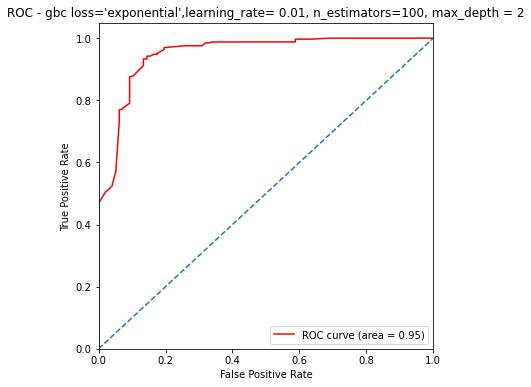

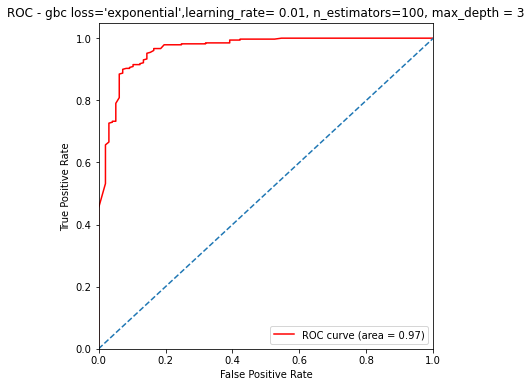

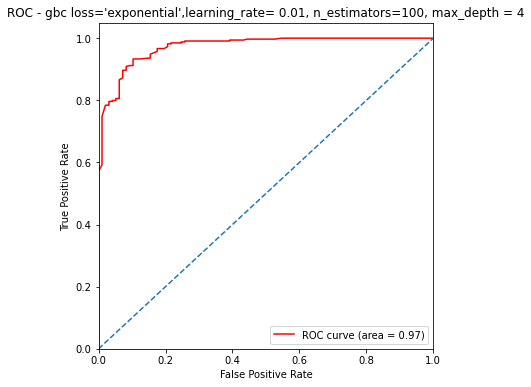

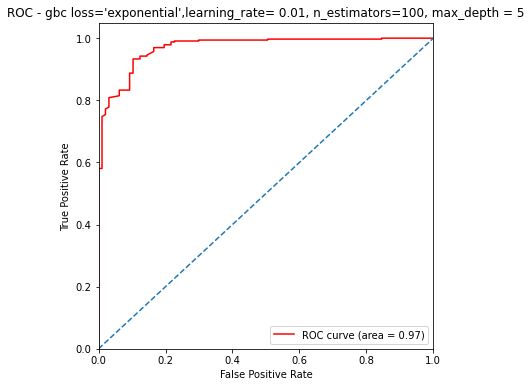

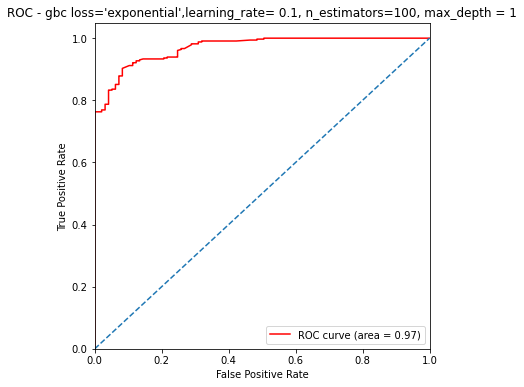

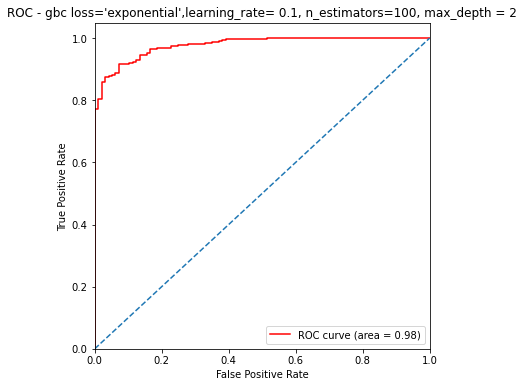

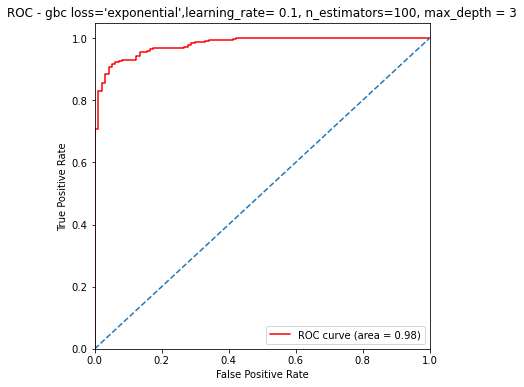

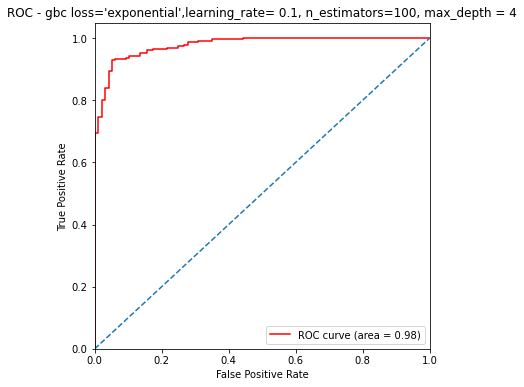

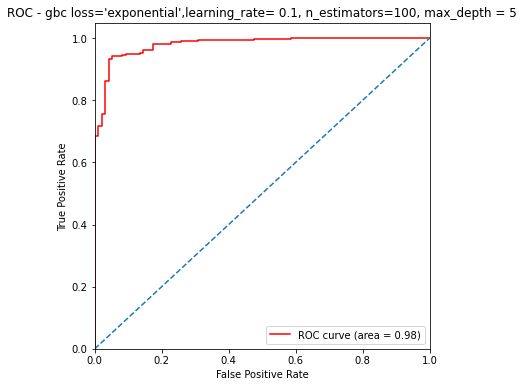

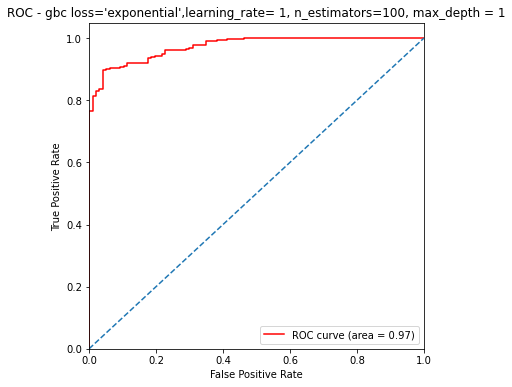

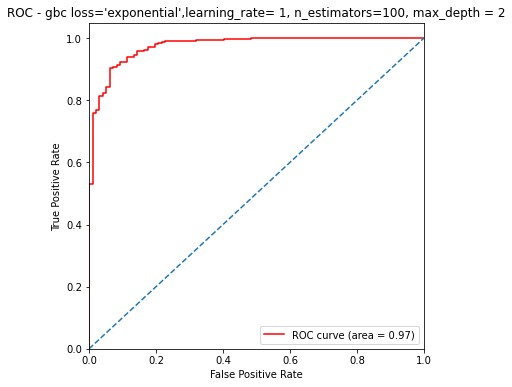

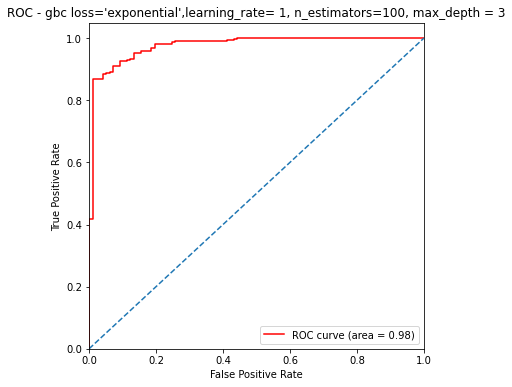

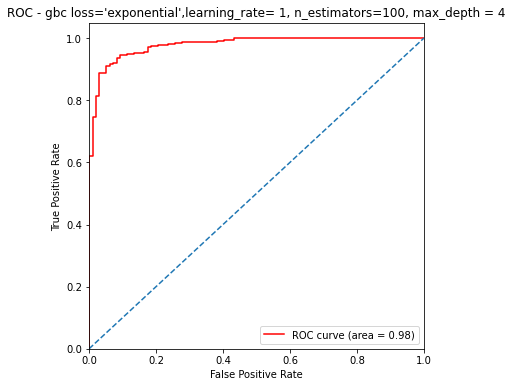

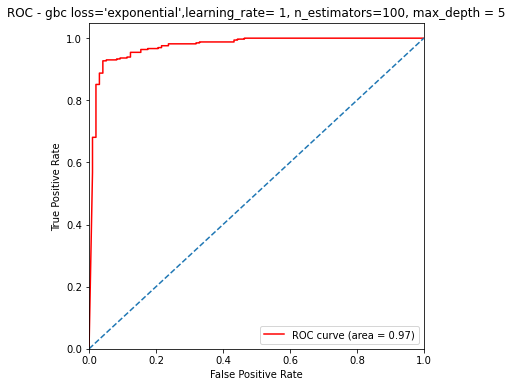

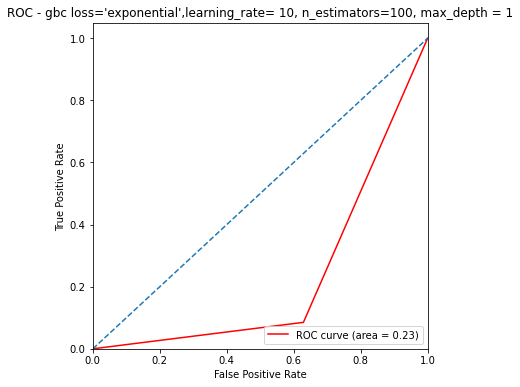

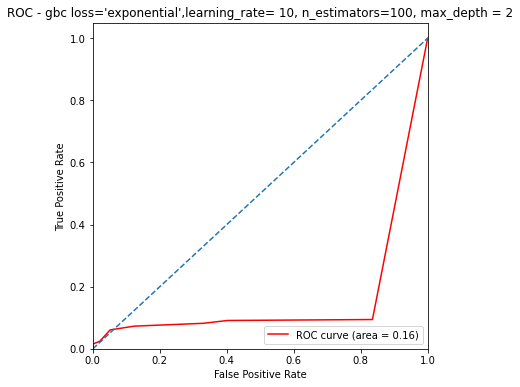

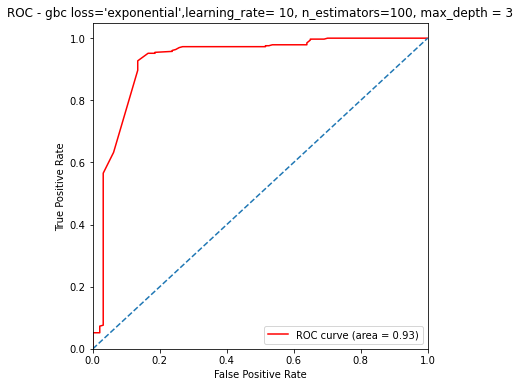

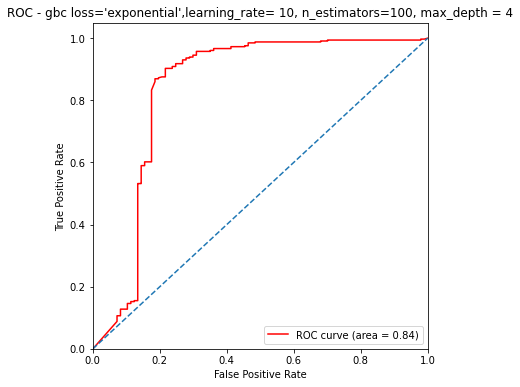

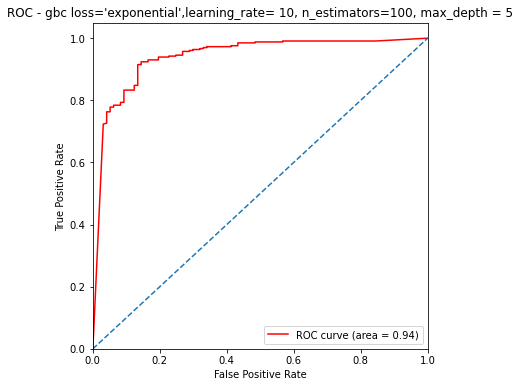

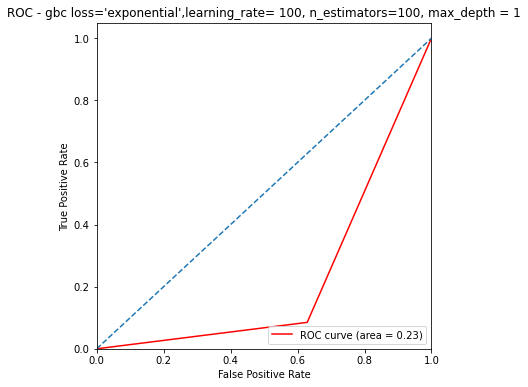

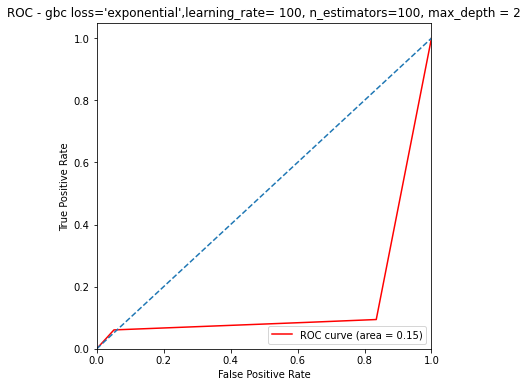

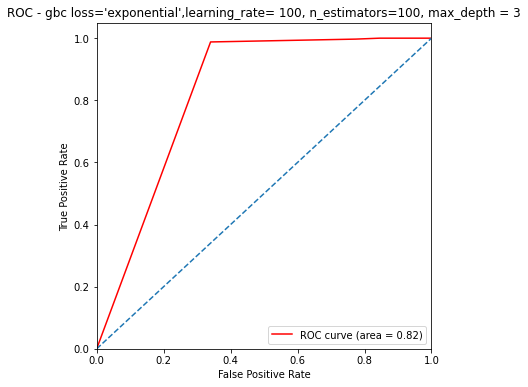

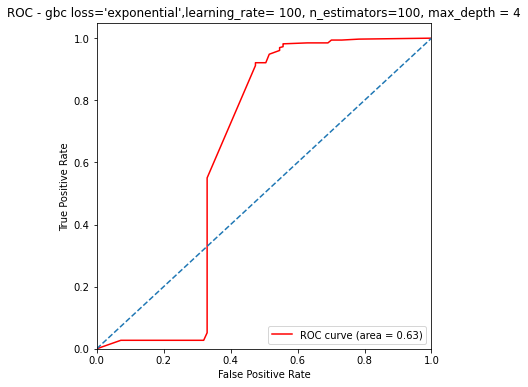

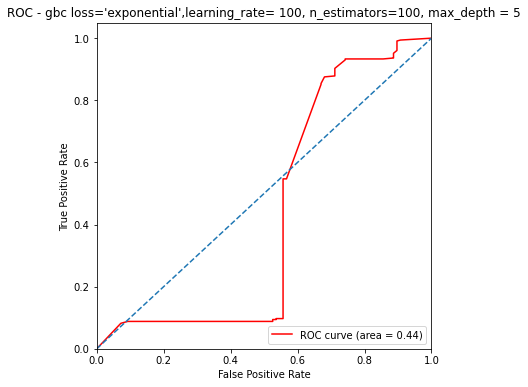

In [95]:
for learning_rate in [0.01, 0.1, 1, 10, 100] : 
    for i in range(1, 6) : 
        gbc = GradientBoostingClassifier(loss='exponential',learning_rate=learning_rate, n_estimators=100, max_depth = i)
        train_and_print(gbc, 'gbc loss=\'exponential\',learning_rate= '+ str(learning_rate) + ', n_estimators=100, max_depth = ' + str(i))

In [96]:
# 예측하는데 큰 상관계수를 가지지 않는 두 데이터를 삭제하고 다시 시도하자.
X_new = health.drop(["light_decelerations" ,"severe_decelerations", "health" ,"fetal_health"], axis=1)
sc = StandardScaler()
X = sc.fit_transform(X_new)

# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7) # 분류용

KNN n_neighbors = 1
훈련 스코어 : 1.000
테스트 스코어 : 0.908
교차 검증 점수:
[0.84037559 0.85446009 0.84037559 0.87793427 0.92018779 0.97652582
 0.83490566 0.94339623 0.80660377 0.64150943]
교차 검증 평균 점수 : 
0.85
오차 행렬:
[[ 75  22]
 [ 17 312]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        97
           1       0.93      0.95      0.94       329

    accuracy                           0.91       426
   macro avg       0.87      0.86      0.87       426
weighted avg       0.91      0.91      0.91       426




KNN n_neighbors = 2
훈련 스코어 : 0.966
테스트 스코어 : 0.906
교차 검증 점수:
[0.83098592 0.8685446  0.83568075 0.84507042 0.89671362 0.97652582
 0.84433962 0.88679245 0.83962264 0.56603774]
교차 검증 평균 점수 : 
0.84
오차 행렬:
[[ 82  15]
 [ 25 304]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.80        97
           1       0.95      0.92      0.94       329

    accuracy                           0.91       426
   m

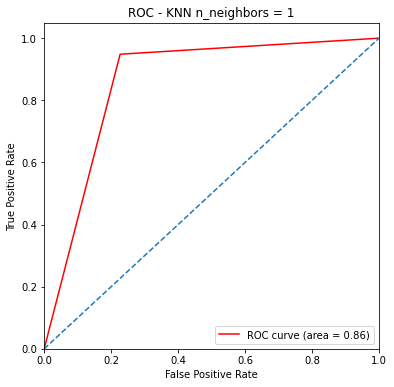

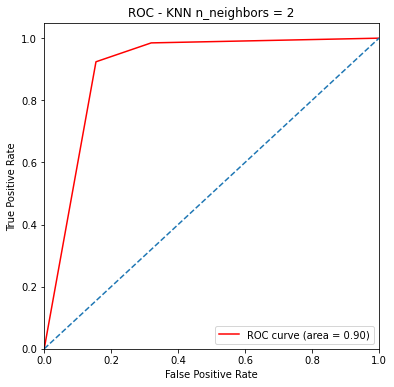

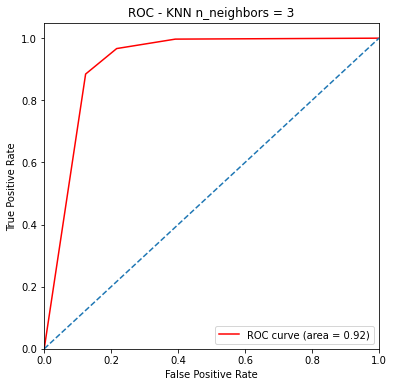

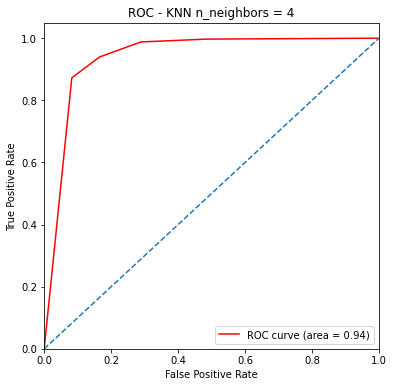

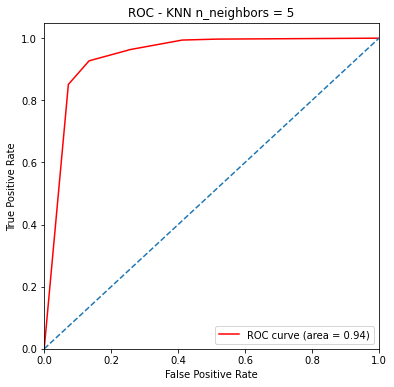

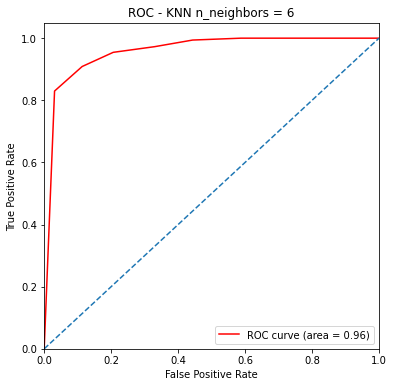

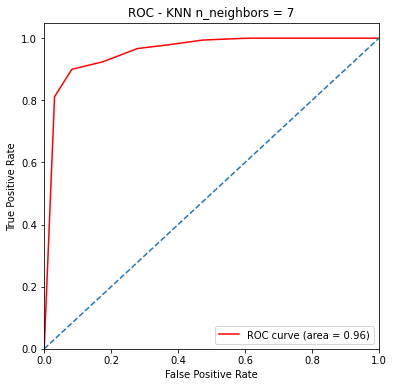

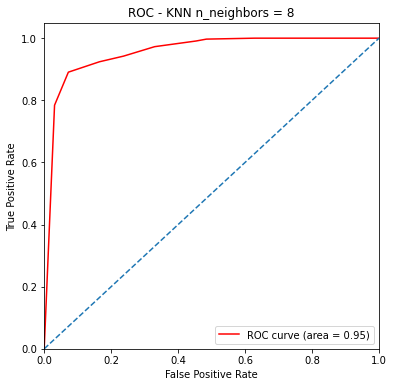

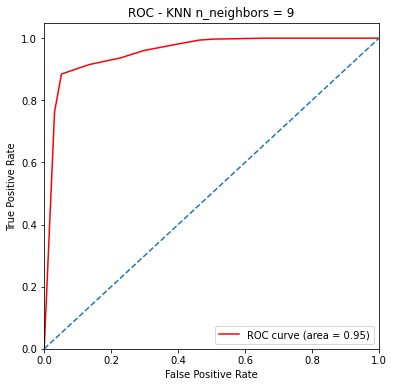

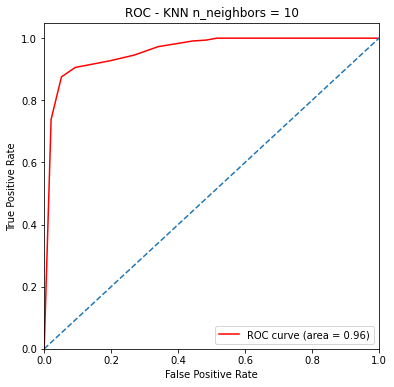

In [97]:
for i in range(1, 11) : 
    knn = KNeighborsClassifier(n_neighbors=i)
    train_and_print(knn, 'KNN n_neighbors = ' + str(i))
    print('\n\n')